# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [28]:
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

In [2]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data Sets\\Crimes_-_2001_to_Present.csv' #(or slice correct index from the crime_files list)
RAW_FILE

'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data Sets\\Crimes_-_2001_to_Present.csv'

In [3]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data Sets'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [5]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.00,12.00,61.00,08B,"1,165,074.00","1,875,917.00",2015,02/10/2018 03:50:01 PM,41.82,-87.67,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.00,29.00,25.00,06,"1,138,875.00","1,904,869.00",2015,02/10/2018 03:50:01 PM,41.90,-87.77,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.00,35.00,21.00,18,"1,152,037.00","1,920,384.00",2015,02/10/2018 03:50:01 PM,41.94,-87.72,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.00,28.00,25.00,08A,"1,141,706.00","1,900,086.00",2015,02/10/2018 03:50:01 PM,41.88,-87.76,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785389,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.00,44.00,6.00,26,"1,172,497.00","1,919,410.00",2022,01/03/2023 03:46:28 PM,41.93,-87.64,"(41.934304581, -87.641484982)"
7785390,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.00,9.00,49.00,11,"1,179,966.00","1,828,818.00",2022,01/03/2023 03:46:28 PM,41.69,-87.62,"(41.685543881, -87.616812541)"
7785391,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.00,5.00,43.00,06,"1,193,181.00","1,859,005.00",2022,01/03/2023 03:46:28 PM,41.77,-87.57,"(41.768068052, -87.567452932)"
7785392,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.00,45.00,11.00,18,"1,140,553.00","1,933,418.00",2022,01/03/2023 03:46:28 PM,41.97,-87.76,"(41.973391184, -87.758534512)"


In [6]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/05/2015 01:30:00 PM'

Timestamp('2015-09-05 01:30:00')

In [7]:
# this cell can take up to 1 min to run
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1333483,G032501,01/01/2001 01:00:00 PM,025XX W 119 ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.00,NaN,NaN,14,"1,161,850.00","1,825,696.00",2001,08/17/2015 03:03:40 PM,41.68,-87.68,"(41.677370879, -87.683217554)"
2001-01-01 01:00:00,1323184,G017467,01/01/2001 01:00:00 PM,102XX S WOOD ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.00,NaN,NaN,26,"1,166,196.00","1,836,771.00",2001,08/17/2015 03:03:40 PM,41.71,-87.67,"(41.707671475, -87.666996186)"
2001-01-01 01:00:00,6808288,HR218860,01/01/2001 01:00:00 PM,004XX E OAKWOOD BLVD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.00,3.00,38.00,06,"1,179,872.00","1,878,745.00",2001,05/07/2009 01:05:12 AM,41.82,-87.62,"(41.822551254, -87.615631965)"
2001-01-01 01:00:00,1325760,G001074,01/01/2001 01:00:00 PM,029XX S CALIFORNIA AV,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.00,NaN,NaN,18,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2001-01-01 01:00:00,1310873,G001502,01/01/2001 01:00:00 PM,052XX W LEXINGTON ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.00,NaN,NaN,26,"1,141,454.00","1,896,084.00",2001,08/17/2015 03:03:40 PM,41.87,-87.76,"(41.870926097, -87.756145329)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-22 12:45:00,13049965,JG232793,04/22/2023 12:45:00 AM,041XX W MAYPOLE AVE,0488,BATTERY,AGGRAVATED DOMESTIC BATTERY - HANDGUN,STREET,False,True,1114,11.00,28.00,26.00,04B,"1,148,826.00","1,901,133.00",2023,04/29/2023 04:47:56 PM,41.88,-87.73,"(41.884641914, -87.728949284)"
2023-04-22 12:49:00,13051344,JG234460,04/22/2023 12:49:00 PM,081XX S TALMAN AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,835,8.00,18.00,70.00,08A,"1,160,125.00","1,850,391.00",2023,04/29/2023 04:47:56 PM,41.75,-87.69,"(41.745173774, -87.688855083)"
2023-04-22 12:52:00,13049931,JG232808,04/22/2023 12:52:00 AM,022XX W ERIE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,1221,12.00,26.00,24.00,08B,"1,161,415.00","1,904,303.00",2023,04/29/2023 04:47:56 PM,41.89,-87.68,"(41.893088061, -87.682632313)"


In [8]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Community Area         0.08
FBI Code               0.00
X Coordinate           0.01
Y Coordinate           0.01
Year                   0.00
Updated On             0.00
Latitude               0.01
Longitude              0.01
Location               0.01
dtype: float64

## Separate the Full Dataset by Years

In [9]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(str)
chicago_full["Year"].value_counts()

2002    486804
2001    485879
2003    475980
2004    469421
2005    453771
2006    448174
2007    437084
2008    427167
2009    392819
2010    370496
2011    351964
2012    336262
2013    307468
2014    275731
2016    269786
2017    269071
2018    268773
2015    264755
2019    261246
2022    238216
2020    212097
2021    208572
2023     73858
Name: Year, dtype: int64

In [10]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [11]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.00,NaN,2001,41.68,-87.68
2001-01-01 01:00:00,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.00,NaN,2001,41.71,-87.67
2001-01-01 01:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.00,3.00,2001,41.82,-87.62
2001-01-01 01:00:00,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.00,NaN,2001,NaN,NaN
2001-01-01 01:00:00,1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.00,NaN,2001,41.87,-87.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-22 12:45:00,13049965,04/22/2023 12:45:00 AM,BATTERY,AGGRAVATED DOMESTIC BATTERY - HANDGUN,STREET,False,True,1114,11.00,28.00,2023,41.88,-87.73
2023-04-22 12:49:00,13051344,04/22/2023 12:49:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,835,8.00,18.00,2023,41.75,-87.69
2023-04-22 12:52:00,13049931,04/22/2023 12:52:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,1221,12.00,26.00,2023,41.89,-87.68


In [12]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7785394 entries, 2001-01-01 01:00:00 to 2023-04-22 12:59:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 727.6+ MB


In [13]:
chicago_final.memory_usage(deep=True).astype(float)

Index                   62,283,152.00
ID                      62,283,152.00
Date                   615,046,126.00
Primary Type           521,905,290.00
Description            569,837,692.00
Location Description   530,651,830.00
Arrest                   7,785,394.00
Domestic                 7,785,394.00
Beat                    62,283,152.00
District                62,283,152.00
Ward                    62,283,152.00
Year                   474,909,034.00
Latitude                62,283,152.00
Longitude               62,283,152.00
dtype: float64

In [14]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [15]:
FINAL_DROP = ['Datetime','Year']#,'Location Description']

In [19]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[ year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to C:\Users\Chris Palisoc\Documents\Coding Dojo\Data Sets
- Succesfully saved C:\Users\Chris Palisoc\Documents\Coding Dojo\Data SetsChicago-Crime_2001.csv
- Succesfully saved C:\Users\Chris Palisoc\Documents\Coding Dojo\Data SetsChicago-Crime_2002.csv
- Succesfully saved C:\Users\Chris Palisoc\Documents\Coding Dojo\Data SetsChicago-Crime_2003.csv
- Succesfully saved C:\Users\Chris Palisoc\Documents\Coding Dojo\Data SetsChicago-Crime_2004.csv
- Succesfully saved C:\Users\Chris Palisoc\Documents\Coding Dojo\Data SetsChicago-Crime_2005.csv
- Succesfully saved C:\Users\Chris Palisoc\Documents\Coding Dojo\Data SetsChicago-Crime_2006.csv
- Succesfully saved C:\Users\Chris Palisoc\Documents\Coding Dojo\Data SetsChicago-Crime_2007.csv
- Succesfully saved C:\Users\Chris Palisoc\Documents\Coding Dojo\Data SetsChicago-Crime_2008.csv
- Succesfully saved C:\Users\Chris Palisoc\Documents\Coding Dojo\Data SetsChicago-Crime_2009.csv
- Succesfully saved C:\Users\Chris Palisoc\Document

In [20]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2001.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2002.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2003.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2004.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2005.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2006.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2007.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2008.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2009.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2010.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data SetsChicago-Crime_2011.csv',
 'C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Da

In [21]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [22]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.00,NaN,41.68,-87.68
1,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.00,NaN,41.71,-87.67
2,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.00,3.00,41.82,-87.62
3,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.00,NaN,NaN,NaN
4,1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.00,NaN,41.87,-87.76
...,...,...,...,...,...,...,...,...,...,...,...,...
73853,13049965,04/22/2023 12:45:00 AM,BATTERY,AGGRAVATED DOMESTIC BATTERY - HANDGUN,STREET,False,True,1114,11.00,28.00,41.88,-87.73
73854,13051344,04/22/2023 12:49:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,835,8.00,18.00,41.75,-87.69
73855,13049931,04/22/2023 12:52:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,1221,12.00,26.00,41.89,-87.68
73856,13050363,04/22/2023 12:55:00 PM,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,True,True,1723,17.00,35.00,41.96,-87.72


In [23]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485879
2002    486804
2003    475980
2004    469421
2005    453771
2006    448174
2007    437084
2008    427167
2009    392819
2010    370496
2011    351964
2012    336262
2013    307468
2014    275731
2015    264755
2016    269786
2017    269071
2018    268773
2019    261246
2020    212097
2021    208572
2022    238216
2023     73858
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

# Which district has the most crimes? Which has the least?

In [29]:
# display counts of crimes by 'District'
df['District'].value_counts()

8.00     523247
11.00    499839
6.00     455164
7.00     450455
25.00    442924
4.00     442034
3.00     394869
12.00    385700
9.00     380408
2.00     368432
19.00    349373
18.00    349361
5.00     345044
10.00    335417
15.00    333774
1.00     314633
14.00    301313
16.00    260505
22.00    255177
24.00    235088
17.00    224719
20.00    137633
31.00       234
21.00         4
Name: District, dtype: int64

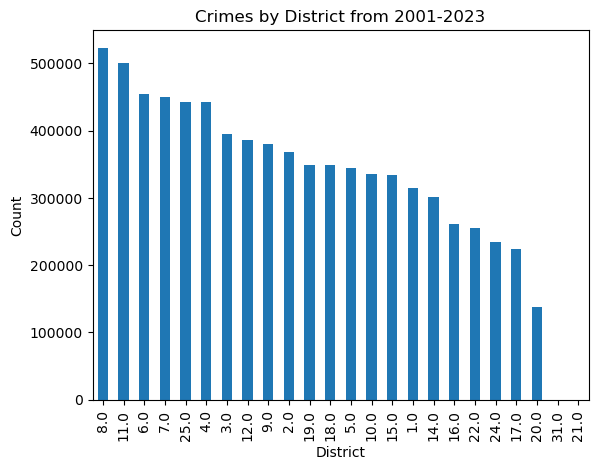

In [33]:
# plot number of crimes by disctrict
counts = df['District'].value_counts()
ax = counts.plot.bar()
ax.set_title('Crimes by District from 2001-2023')
ax.set_xlabel('District')
ax.set_ylabel('Count')
plt.show();

Based on the value counts and plot of the crimes by district above, District 8 had the most crimes with 523,247 cased and district 21 has the least with 4 cases.

# Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [39]:
# convert 'Date' to datetime
df['datetime'] = pd.to_datetime(df['Date'])
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7785394 entries, 0 to 73857
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 727.6+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,datetime
0,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.00,NaN,41.68,-87.68,2001-01-01 13:00:00
1,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.00,NaN,41.71,-87.67,2001-01-01 13:00:00
2,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.00,3.00,41.82,-87.62,2001-01-01 13:00:00


In [40]:
# set 'datetime' as index
df = df.set_index('datetime')
df.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
datetime,,,,,,,,,,,,
2001-01-01 13:00:00,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.00,NaN,41.68,-87.68
2001-01-01 13:00:00,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.00,NaN,41.71,-87.67
2001-01-01 13:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.00,3.00,41.82,-87.62


In [43]:
# drop irrelevant columns
columns = ['ID', 'Date', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'Ward', 'Latitude', 'Longitude']
df = df.drop(columns=columns)
df.head(3)

,Primary Type,District
datetime,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,22.00
2001-01-01 13:00:00,OTHER OFFENSE,22.00
2001-01-01 13:00:00,THEFT,2.00


In [44]:
df

,Primary Type,District
datetime,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,22.00
2001-01-01 13:00:00,OTHER OFFENSE,22.00
2001-01-01 13:00:00,THEFT,2.00
2001-01-01 13:00:00,NARCOTICS,10.00
2001-01-01 13:00:00,OTHER OFFENSE,15.00
...,...,...
2023-04-22 00:45:00,BATTERY,11.00
2023-04-22 12:49:00,OTHER OFFENSE,8.00
2023-04-22 00:52:00,BATTERY,12.00


In [55]:
# convert dtype of 'Distric' to object
df['District'] = df['District'].astype('object')

In [54]:
# Resample data as annual
df_year = df.groupby('Primary Type').resample('A').sum()['District'].reset_index()
df_year

,Primary Type,datetime,District
0,ARSON,2001-12-31,"11,870.00"
1,ARSON,2002-12-31,"12,169.00"
2,ARSON,2003-12-31,"10,627.00"
3,ARSON,2004-12-31,"9,509.00"
4,ARSON,2005-12-31,"7,930.00"
...,...,...,...
748,WEAPONS VIOLATION,2019-12-31,"59,551.00"
749,WEAPONS VIOLATION,2020-12-31,"79,120.00"
750,WEAPONS VIOLATION,2021-12-31,"87,874.00"
751,WEAPONS VIOLATION,2022-12-31,"85,122.00"


In [61]:
df['Primary Type'].value_counts()

THEFT                                1642313
BATTERY                              1423053
CRIMINAL DAMAGE                       887362
NARCOTICS                             747642
ASSAULT                               507349
OTHER OFFENSE                         483681
BURGLARY                              424419
MOTOR VEHICLE THEFT                   375565
DECEPTIVE PRACTICE                    344987
ROBBERY                               292370
CRIMINAL TRESPASS                     214328
WEAPONS VIOLATION                     106433
PROSTITUTION                           69840
OFFENSE INVOLVING CHILDREN             55726
PUBLIC PEACE VIOLATION                 52330
SEX OFFENSE                            30686
CRIM SEXUAL ASSAULT                    27631
INTERFERENCE WITH PUBLIC OFFICER       18393
LIQUOR LAW VIOLATION                   14902
GAMBLING                               14618
ARSON                                  13250
HOMICIDE                               12549
KIDNAPPING

In [63]:
# get list of total crimes per year
crime_year = df.groupby(pd.Grouper(freq='Y')).size()
crime_year

datetime
2001-12-31    485879
2002-12-31    486804
2003-12-31    475980
2004-12-31    469421
2005-12-31    453771
2006-12-31    448174
2007-12-31    437084
2008-12-31    427167
2009-12-31    392819
2010-12-31    370496
2011-12-31    351964
2012-12-31    336262
2013-12-31    307468
2014-12-31    275731
2015-12-31    264755
2016-12-31    269786
2017-12-31    269071
2018-12-31    268773
2019-12-31    261246
2020-12-31    212097
2021-12-31    208572
2022-12-31    238216
2023-12-31     73858
Freq: A-DEC, dtype: int64

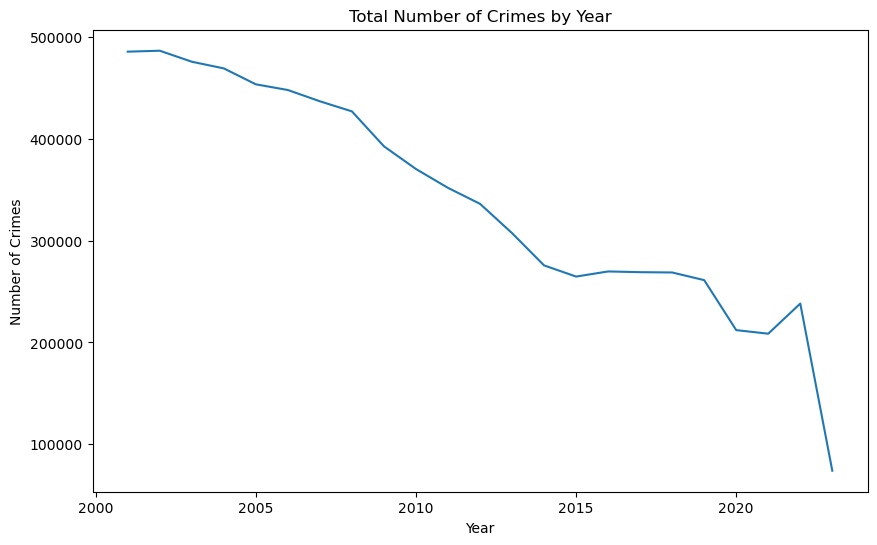

In [65]:
# plot total crimes per year over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(crime_year.index.year, crime_year.values)
ax.set_title('Total Number of Crimes by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes')
plt.show()

Based on the plot above, total crime numbers decrease over the years.

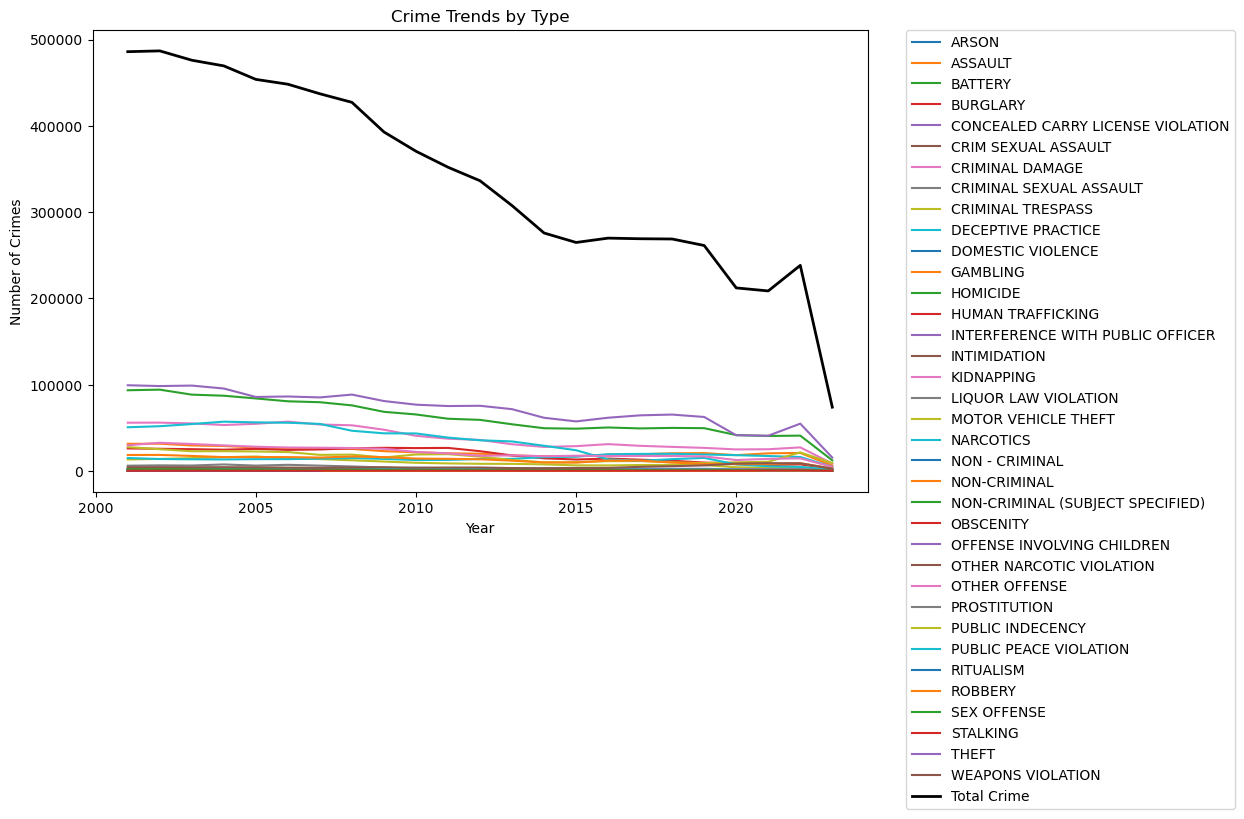

In [71]:
# group data by year and crime type
yearly_crime = df.groupby([df.index.year, 'Primary Type'])['Primary Type'].count().unstack()

# calculate total crime count for each year
yearly_total = yearly_crime.sum(axis=1)

# plot individual crime trends alongside overall trend
plt.figure(figsize=(10, 6))

for col in yearly_crime.columns:
    plt.plot(yearly_crime[col], label=col)

plt.plot(yearly_total, label='Total Crime', color='black', linewidth=2)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Trends by Type')
plt.show()

the above plot shows that theft showed an slight increase while overall crime was decreasing after 2020.

#  Comparing Holidays:
- Are there any holidays that show an increase in the # of crimes?
- Are there any holidays that show a decrease in the # of crimes?

In [108]:
!pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays

     -------------------------------------- 499.9/499.9 kB 1.6 MB/s eta 0:00:00


In [109]:
# Instance of US Holidays
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [110]:
# create and display 'US Holiday' column corresponding to datetime index
df['US Holiday'] = df.index.map(us_holidays.get)
df

,Primary Type,District,US Holiday
datetime,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,22.00,New Year's Day
2001-01-01 13:00:00,OTHER OFFENSE,22.00,New Year's Day
2001-01-01 13:00:00,THEFT,2.00,New Year's Day
2001-01-01 13:00:00,NARCOTICS,10.00,New Year's Day
2001-01-01 13:00:00,OTHER OFFENSE,15.00,New Year's Day
...,...,...,...
2023-04-22 00:45:00,BATTERY,11.00,None
2023-04-22 12:49:00,OTHER OFFENSE,8.00,None
2023-04-22 00:52:00,BATTERY,12.00,None


In [111]:
# display number of crimes on each holiday
df['US Holiday'].value_counts()

New Year's Day                                     33531
Independence Day                                   22666
Labor Day                                          22157
Memorial Day                                       21123
Columbus Day                                       20915
Veterans Day                                       20416
Martin Luther King Jr. Day                         18590
Washington's Birthday                              18224
Thanksgiving                                       14793
Christmas Day                                      12414
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5519
Christmas Day (Observed)                            4927
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1402
Name: US Holiday, dtype: int64

There is an increase in the number of crimes on New Year's Day and a decrease in crimes during the Observed Juneteenth Holiday.